In [17]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

## Functions

In [2]:
import math
def checkAdjacent(ind1,ind2):
    x1,y1 = ind1
    x2,y2 = ind2
    dis = math.sqrt((x2-x1)**2+(y2-y1)**2)
    return (dis < 2)

## Code

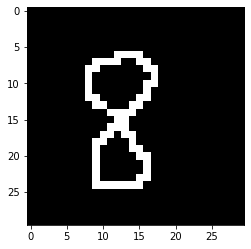

In [17]:
img = cv2.imread("images/t5.png",0)
img[img>0] = 1
plt.imshow(img,'gray')

In [15]:
# Get all points which value is 1
indexes = np.where(img == 1)
indexes = list(zip(indexes[0],indexes[1]))

# Get all adjacent points and place them next to each others
points = []
lines = []

# print(len(indexes))
for i in range(len(indexes)):
    for j, point in enumerate(indexes):
        if points:
            if (not points[-1] ==  indexes[j]) and checkAdjacent(points[-1],indexes[j]) and (not indexes[j] in points):
                points.append(indexes[j])
        else:
            points.append(indexes[i])
    if not indexes[i] in points:
        points.append(indexes[i])
print(points)

[(6, 12), (6, 13), (6, 14), (6, 15), (7, 15), (7, 16), (8, 16), (8, 17), (9, 17), (10, 16), (10, 17), (11, 16), (12, 15), (12, 16), (13, 15), (14, 14), (15, 13), (16, 12), (16, 13), (17, 13), (17, 14), (18, 14), (19, 14), (19, 15), (20, 15), (20, 16), (21, 16), (22, 16), (23, 15), (23, 16), (24, 15), (24, 14), (24, 13), (24, 12), (24, 11), (7, 9), (7, 10), (7, 11), (7, 12), (8, 8), (8, 9), (9, 8), (10, 8), (11, 8), (12, 8), (12, 9), (13, 9), (13, 10), (14, 11), (14, 12), (14, 13), (15, 12), (16, 11), (17, 10), (17, 11), (18, 10), (19, 9), (20, 9), (21, 9), (22, 9), (23, 9), (24, 9), (24, 10), (13, 14), (18, 9)]


In [10]:
head = -1
for i,point in enumerate(points):
    if head < 0:
        head =  i
    if i < len(points)-1 and (not checkAdjacent(point,points[i+1])):
        lines.append(points[head:i+1])
        head = -1
    else:
        if i == len(points)-1:
            lines.append([point])

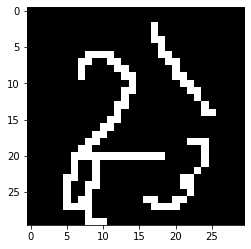

In [11]:
board = np.zeros_like(img)
for line in lines:
    for point in line:
        x,y = point
        if point == line[-1]:
            board[x,y] = 1
        else:
            board[x,y] = 1

plt.imshow(board,'gray')

In [13]:
print((img == board).any())

True


## New New Algorithm

In [ ]:
def advanceAdjacent(ind1,ind2):
    x1,y1 = ind1
    x2,y2 = ind2
    dis = math.sqrt((x2-x1)**2+(y2-y1)**2)
    return (dis < 2)

In [81]:
# Get all points which value is 1
indexes = np.where(img == 1)
indexes = list(zip(indexes[0],indexes[1]))

# Get all adjacent points and place them next to each others
points = []
lines = []

while len(indexes) > 0:
    if len(points) == 0:
        points.append(indexes[0])
        indexes.remove(indexes[0])
    else:
        indexes_len = len(indexes)
        data = findAdjacent(points[-1],indexes,points)
        if data:
            _,indexes,points = data
        elif indexes_len == len(indexes):
            points.append(indexes[0])
            indexes.remove(indexes[0])
print(points)

[(6, 12), (6, 13), (6, 14), (6, 15), (7, 15), (7, 16), (8, 16), (8, 17), (9, 17), (10, 16), (10, 17), (11, 16), (12, 15), (12, 16), (13, 15), (13, 14), (14, 13), (14, 12), (14, 11), (13, 10), (12, 9), (11, 8), (10, 8), (9, 8), (8, 8), (7, 9), (7, 10), (7, 11), (7, 12), (8, 9), (12, 8), (13, 9), (14, 14), (15, 13), (15, 12), (16, 11), (16, 12), (16, 13), (17, 13), (17, 14), (18, 14), (19, 14), (19, 15), (20, 15), (20, 16), (21, 16), (22, 16), (23, 15), (23, 16), (24, 15), (24, 14), (24, 13), (24, 12), (24, 11), (24, 10), (23, 9), (22, 9), (21, 9), (20, 9), (19, 9), (18, 9), (17, 10), (17, 11), (18, 10), (24, 9)]


In [76]:
print(indexes)

[(15, 12), (15, 13), (16, 11), (16, 12), (16, 13), (17, 10), (17, 11), (17, 13), (17, 14), (18, 9), (18, 10), (18, 14), (19, 9), (19, 14), (19, 15), (20, 9), (20, 15), (20, 16), (21, 9), (21, 16), (22, 9), (22, 16), (23, 9), (23, 15), (23, 16), (24, 9), (24, 10), (24, 11), (24, 12), (24, 13), (24, 14), (24, 15)]


In [57]:
# points.append(indexes[0])
# indexes.remove(indexes[0])
# indexes.remove((6,12))
x,y = (6,13)
print(findAdjacent((6,13),indexes))

(6, 12)
((6, 12), [(6, 13), (6, 14), (6, 15), (7, 9), (7, 10), (7, 11), (7, 12), (7, 15), (7, 16), (8, 8), (8, 9), (8, 16), (8, 17), (9, 8), (9, 17), (10, 8), (10, 16), (10, 17), (11, 8), (11, 16), (12, 8), (12, 9), (12, 15), (12, 16), (13, 9), (13, 10), (13, 14), (13, 15), (14, 11), (14, 12), (14, 13), (14, 14), (15, 12), (15, 13), (16, 11), (16, 12), (16, 13), (17, 10), (17, 11), (17, 13), (17, 14), (18, 9), (18, 10), (18, 14), (19, 9), (19, 14), (19, 15), (20, 9), (20, 15), (20, 16), (21, 9), (21, 16), (22, 9), (22, 16), (23, 9), (23, 15), (23, 16), (24, 9), (24, 10), (24, 11), (24, 12), (24, 13), (24, 14), (24, 15)])


In [69]:
def findAdjacent(index,indexes,points):
    for i in range(-1,2):
        for j in range(-1,2):
            x,y = index
            if (x+i,y+j) in indexes:
                point = (x+i, y+j) 
                if point in indexes and (not point in points):
                    points.append(point)
                    indexes.remove(point)
                    return (point,indexes,points)

In [68]:
for i in range(-1,2):
    for j in range(-1,2):
        print(f"(x{i},y{j})")

(x-1,y-1)
(x-1,y0)
(x-1,y1)
(x0,y-1)
(x0,y0)
(x0,y1)
(x1,y-1)
(x1,y0)
(x1,y1)


## Element wise Drawing

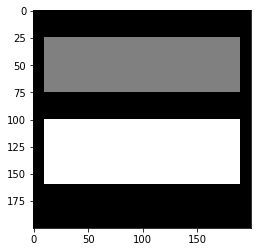

In [98]:
# Object wise drawing
img = cv2.imread("images/img.png",0)
ret, labels = cv2.connectedComponents(img)
plt.imshow(labels,'gray')

In [40]:
f_points = []
for j in range(1,np.unique(labels).max()+1):
    label = np.zeros_like(labels)
    label[labels == j] = 1


    indexes = np.where(label == 1)
    indexes = list(zip(indexes[0],indexes[1]))

    table_sorted = {}
    for st_point in indexes:
        point_arr = []
        point_val = []
        for point in indexes:
            point_arr.append(point)
            dis = findDistance(st_point,point)
            point_val.append(dis)

        points = [x for _, x in sorted(zip(point_val, point_arr))]
        table_sorted[points[0]] = points

    points = [indexes[0]]
    while len(points) < len(indexes):
        temp = points[-1]
        temp_arr = table_sorted[temp]
        for t_ele in temp_arr:
            if not t_ele in points:
                points.append(t_ele)
                break

    f_points.append(points)
plt.imshow(label,'gray')

KeyboardInterrupt: 

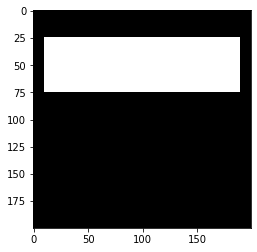

In [99]:
label = np.zeros_like(labels)
label[labels == 1] = 1
plt.imshow(label,'gray')

In [100]:
dis_index = []
dis_value = []
def findDistance(ind):
    ind1,ind2 = ind
    com_point = (ind1,ind2)
    if (com_point in dis_index) or ((ind2,ind1) in dis_index):
        if com_point in dis_index:
            return dis_value[dis_index.index(com_point)]
        else:
            return dis_value[dis_index.index((ind2,ind1))]
    else:
        x1,y1 = ind1
        x2,y2 = ind2
        dis = math.sqrt((x2-x1)**2+(y2-y1)**2)

        dis_index.append(com_point)
        dis_value.append(dis)
        return dis

In [101]:
# %%timeit
import multiprocessing as mp


p = mp.Pool(mp.cpu_count())
indexes = np.where(label == 1)
indexes = list(zip(indexes[0],indexes[1]))
# indexes = [(0,0),(0,1),(0,2),(1,2),(2,2),(3,1),(3,0)]

# st_point = indexes[0] # get the list of distances from this point
table_sorted = {}
for st_point in indexes:
    point_arr1 = [st_point]*len(indexes)
    point_arr = indexes

    point_tr = list(zip(point_arr1,point_arr))
    point_val = p.map(findDistance,point_tr)

    points = [x for _, x in sorted(zip(point_val, point_arr))]
    table_sorted[points[0]] = points
p.close()
# print(table_sorted)

Process ForkPoolWorker-1419:
Process ForkPoolWorker-1422:
Process ForkPoolWorker-1421:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Process ForkPoolWorker-1420:
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python

KeyboardInterrupt: 

In [97]:
# %%timeit
indexes = np.where(label == 1)
indexes = list(zip(indexes[0],indexes[1]))
# indexes = [(0,0),(0,1),(0,2),(1,2),(2,2),(3,1),(3,0)]

# st_point = indexes[0] # get the list of distances from this point
table_sorted = {}
for st_point in indexes:
    point_arr1 = [st_point]*len(indexes)
    point_arr = indexes

    point_tr = list(zip(point_arr1,point_arr))
    point_val = list(map(findDistance,point_tr))

    points = [x for _, x in sorted(zip(point_val, point_arr))]
    table_sorted[points[0]] = points
p.close()
# print(table_sorted)

In [95]:
points = [indexes[0]]
while len(points) < len(indexes):
    temp = points[-1]
    temp_arr = table_sorted[temp]
    for t_ele in temp_arr:
        if not t_ele in points:
            points.append(t_ele)
            break
print(points)

[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 1), (3, 0)]


In [33]:
print(points)

[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 1), (3, 0)]
